In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np

# Hyper parameters
batch_size = 128
nb_epoch = 100

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 500
corruption_level = 0.3

Using TensorFlow backend.


In [2]:
# Load MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
# Add random noise
x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


In [4]:
# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
# Train
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s - loss: 0.2756 - val_loss: 0.2261
Epoch 2/100
60000/60000 [==============================] - 3s - loss: 0.2044 - val_loss: 0.1851
Epoch 3/100
60000/60000 [==============================] - 3s - loss: 0.1747 - val_loss: 0.1634
Epoch 4/100
60000/60000 [==============================] - 3s - loss: 0.1572 - val_loss: 0.1491
Epoch 5/100
60000/60000 [==============================] - 3s - loss: 0.1450 - val_loss: 0.1386
Epoch 6/100
60000/60000 [==============================] - 3s - loss: 0.1360 - val_loss: 0.1308
Epoch 7/100
60000/60000 [==============================] - 3s - loss: 0.1291 - val_loss: 0.1248
Epoch 8/100
60000/60000 [==============================] - 3s - loss: 0.1238 - val_loss: 0.1201
Epoch 9/100
60000/60000 [==============================] - 3s - loss: 0.1195 - val_loss: 0.1162
Epoch 10/100
60000/60000 [==============================] - 3s - loss: 0.1160 - val_lo

In [11]:
# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

10000/10000 [==============================] - 0s     

Summary: Loss over the test dataset: 0.08


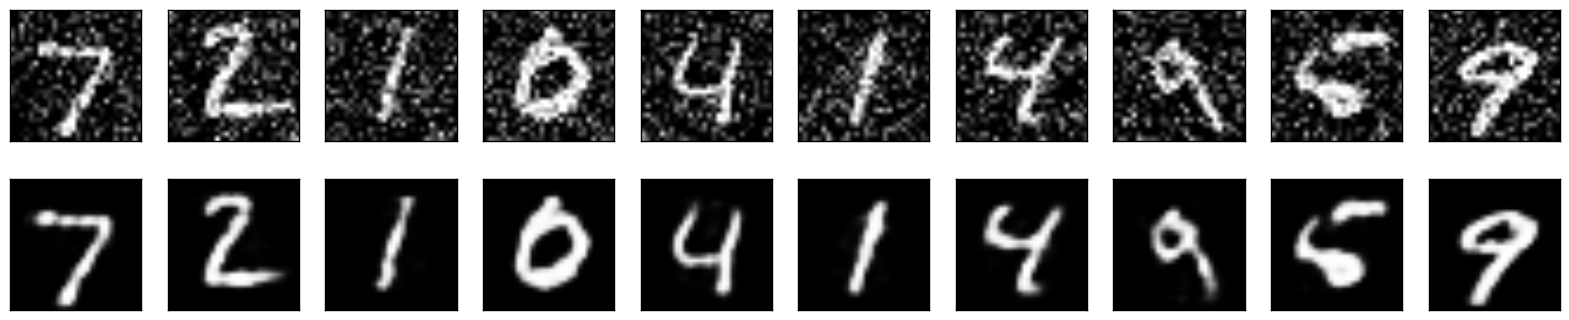

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images 
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()